#**Credit Score and More**




In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats

In [ ]:
path="/content/drive/MyDrive/credit_score/Credit_score.csv"
data=pd.read_csv(path)

<ipython-input-647-485ee06ccb55>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path)


In [ ]:
df=data.copy()

##Understanding Data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.63333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.00000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.00000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.00000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.00000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.00000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.00000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.00000


In [ ]:
df.describe(include=[object]).T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Summary:**

There are several columns having null values and several numberical column which needs to be cleaned and converted into desired datatypes.

#Categorical analysis

##ID

In [ ]:
df.ID.value_counts()

0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: ID, Length: 100000, dtype: int64

##Customer_ID

In [ ]:
df['Customer_ID'].value_counts()

CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: Customer_ID, Length: 12500, dtype: int64

**Summary:**

There are 12500 unique values which represents 12500 unique customers.

##Month

In [ ]:
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

**Summary:**

Data from January to August is available

##Name

In [ ]:
df['Name'].value_counts()

Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: Name, Length: 10139, dtype: int64

In [ ]:
df['Name'].isnull().sum()

9985

In [ ]:
df.groupby(['Customer_ID'])['Name'].transform(lambda x: x.mode()[0])

0        Aaron Maashoh
1        Aaron Maashoh
2        Aaron Maashoh
3        Aaron Maashoh
4        Aaron Maashoh
             ...      
99995            Nicks
99996            Nicks
99997            Nicks
99998            Nicks
99999            Nicks
Name: Name, Length: 100000, dtype: object

In [ ]:
df['Name']=df['Name'].fillna(df.groupby(['Customer_ID'])['Name'].transform(lambda x: x.mode()[0]))

In [ ]:
len(df.groupby(['Customer_ID'])['Name'].value_counts())

12500

**Summary**

After dealing with garbage and null values,12500 unique customer name appears according to their Customer ID appears

##SSN

In [ ]:
df['SSN'].value_counts()

#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: SSN, Length: 12501, dtype: int64

In [ ]:
df['SSN']=df['SSN'].replace("#F%$D@*&8",np.nan)

In [ ]:
df['SSN'].fillna(df.groupby('Customer_ID')['SSN'].transform(lambda x: x.mode()[0]),inplace=True)

**Summary**

After dealing with garbage and null values,12500 unique SSN appears according to their Customer ID appears

##Occupation

In [ ]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [ ]:
df['Occupation']=df['Occupation'].replace("_______",np.nan)

In [ ]:
df['Occupation']=df['Occupation'].fillna(df.groupby(['Customer_ID'])['Occupation'].transform(lambda x: x.mode()[0]))

[]

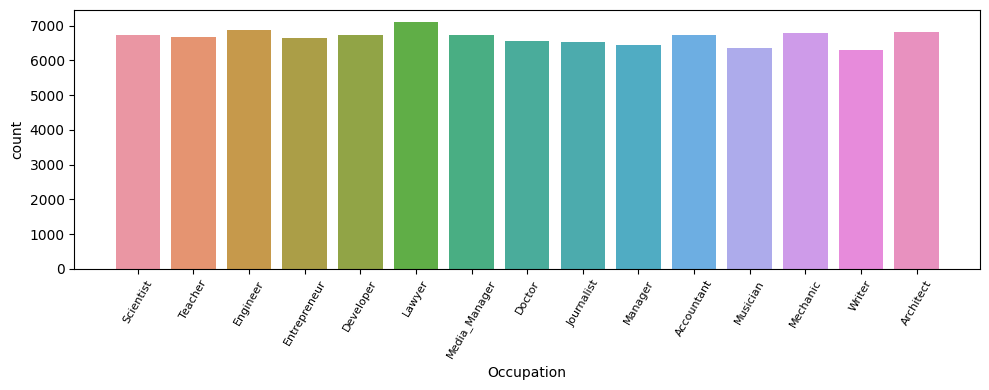

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Occupation')
plt.xticks(size=8,rotation=60)
plt.tight_layout()
plt.plot()

**Summary**

Customers from every occupation is available in significant number, lawayes leads the chart.

##Credit_Mix

In [ ]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [ ]:
df['Credit_Mix'].replace("_",np.nan,inplace=True)

In [ ]:
df['Credit_Mix'].fillna(df.groupby(['Customer_ID'])['Credit_Mix'].transform(lambda x: x.mode()[0]),inplace=True)

<Axes: xlabel='Credit_Mix', ylabel='count'>

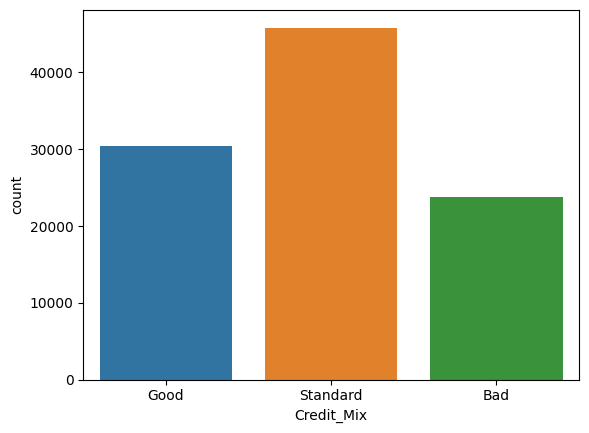

In [ ]:
sns.countplot(data=df,x="Credit_Mix")


**Summary**

Standard type of credit mix leads the chart.

##Payment Behaviour

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [ ]:
df['Payment_Behaviour'].replace("!@9#%8",np.nan,inplace=True)

In [ ]:
df['Payment_Behaviour'].fillna(df.groupby(['Customer_ID'])['Payment_Behaviour'].transform(lambda x: x.mode()[0]),inplace=True)

In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      27767
High_spent_Medium_value_payments    19366
High_spent_Large_value_payments     15348
Low_spent_Medium_value_payments     14621
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Name: Payment_Behaviour, dtype: int64

**Summary**

Low spent small value payments are popular while Low spent large value payment is minimum.

##Types of loan

In [ ]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [ ]:
df['Type_of_Loan'].replace([np.NaN], 'Not Specified', inplace=True)

In [ ]:
loan_types=df['Type_of_Loan'].apply(lambda x: x.replace("and ","")).str.split(", ").explode(ignore_index=True).value_counts().reset_index()

In [ ]:
loan_types.rename({"index":"Type of loan","Type_of_Loan":'Count'},axis=1,inplace=True)

In [ ]:
loan_types

,Type of loan,Count
0,Not Specified,51024
1,Payday Loan,40568
2,Credit-Builder Loan,40440
3,Home Equity Loan,39104
4,Student Loan,38968
5,Mortgage Loan,38936
6,Personal Loan,38888
7,Debt Consolidation Loan,38776
8,Auto Loan,37992


[]

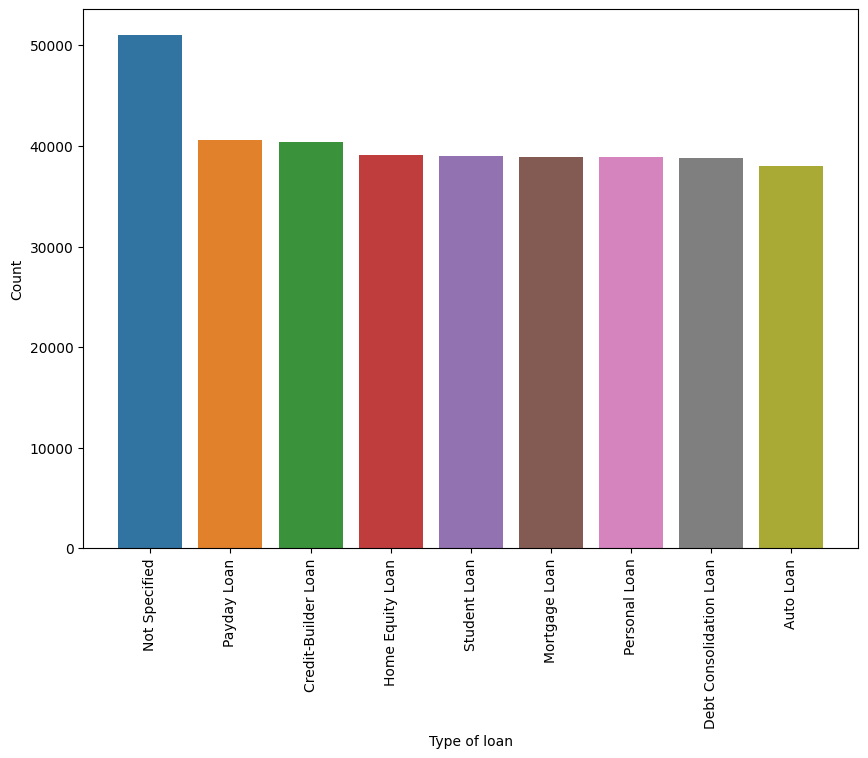

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(data=loan_types,x="Type of loan",y='Count')
plt.xticks(size=10,rotation=90)
plt.plot()

**Summary**

There are 9 types of loan available: Auto Loan,Debt Consolidation Loan,Persoanl Loan,Mortage Loan,Student Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan and Not Specified.

Payday Loan and Not specified loans leads the chart.

## Payment of minimum amount

In [ ]:
df["Payment_of_Min_Amount"].isnull().sum()

0

In [ ]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [ ]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].replace("NM",np.nan)

In [ ]:
df["Payment_of_Min_Amount"]=df["Payment_of_Min_Amount"].fillna(df.groupby(["Customer_ID"])["Payment_of_Min_Amount"].transform(lambda x: x.mode()[0]))

In [ ]:
df["Payment_of_Min_Amount"].value_counts()

Yes    59432
No     40568
Name: Payment_of_Min_Amount, dtype: int64

#Numerical Analysis

##Age

In [ ]:
df['Age'].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [ ]:
df['Age']=df['Age'].str.strip("_").astype(int)

In [ ]:
df['Age']=df.groupby(['Customer_ID'])['Age'].transform(lambda x: x.mode()[0])

[]

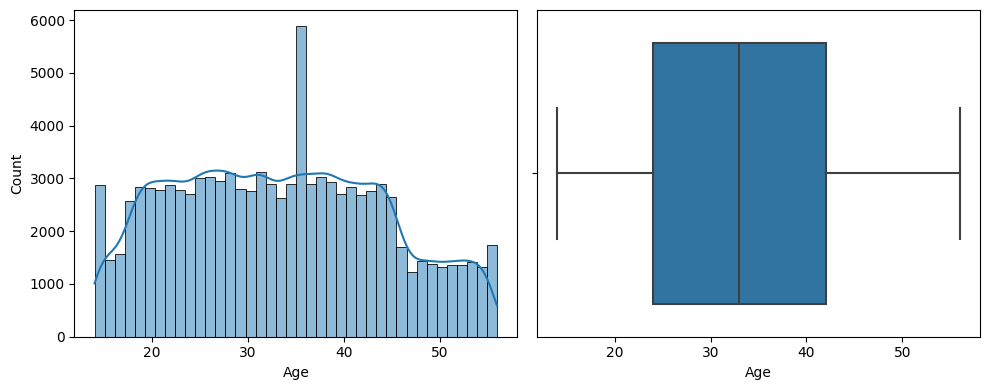

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.histplot(data=df,x="Age",bins=40,ax=axes[0],kde=True)
sns.boxplot(data=df,x="Age",ax=axes[1])
plt.tight_layout()
plt.plot()

In [ ]:
df['Age'].max()

56

In [ ]:
df['Age'].min()

14

**Summary**

1)The age of customers ranges between 14-56.

2)The median age lies between 30 to 40 years.


##Annual Income

In [ ]:
df['Annual_Income'].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933       1
Name: Annual_Income, Length: 18940, dtype: int64

In [ ]:
df['Annual_Income']=df['Annual_Income'].str.strip("_").astype(float)

In [ ]:
len(df.groupby(['Customer_ID'])['Annual_Income'].value_counts())
# the length should be 12500, but it is showing 13625, some more cleaning works need to be done

13625

In [ ]:
df['Annual_Income']=df.groupby('Customer_ID')['Annual_Income'].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby('Customer_ID')['Annual_Income'].value_counts())

12500

In [ ]:
df['Annual_Income'].max()

179987.28

In [ ]:
df['Annual_Income'].min()

7005.93

[]

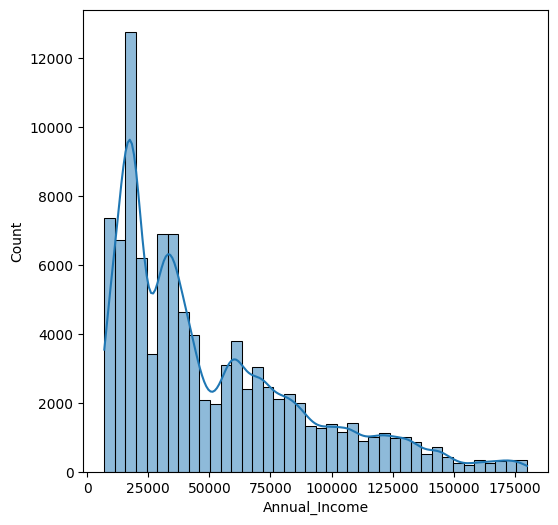

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='Annual_Income',bins=40,kde=True)
plt.plot()

**Summary**

1)Visual representation shows skewed graph for income, with minimum income 7005$ and maximum 179987.

##Monthly Salary

In [ ]:
df['Monthly_Inhand_Salary'].isna().sum()

15002

In [ ]:
df['Monthly_Inhand_Salary'].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [ ]:
df['Monthly_Inhand_Salary']=df.groupby(['Customer_ID'])['Monthly_Inhand_Salary'].transform(lambda x: x.mode()[0])


In [ ]:
len(df.groupby(['Customer_ID'])['Monthly_Inhand_Salary'])

12500

In [ ]:
df['Monthly_Inhand_Salary'].max()

15204.63333

In [ ]:
df['Monthly_Inhand_Salary'].min()

303.6454167

[]

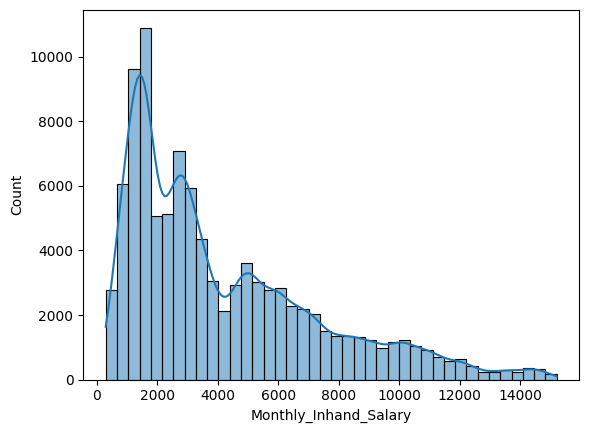

In [ ]:
sns.histplot(data=df,x='Monthly_Inhand_Salary',bins=40,kde=True)
plt.plot()

**Summary**

1)As expected the monthly inhand salary is also skewed.

2)Minimum is as low as $303 and maximum as $15204

##Number of Account

In [ ]:
df['Num_Bank_Accounts'].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [ ]:
df['Num_Bank_Accounts']=df.groupby(["Customer_ID"])['Num_Bank_Accounts'].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(["Customer_ID"])['Num_Bank_Accounts'].value_counts())

12500

<Axes: xlabel='Num_Bank_Accounts'>

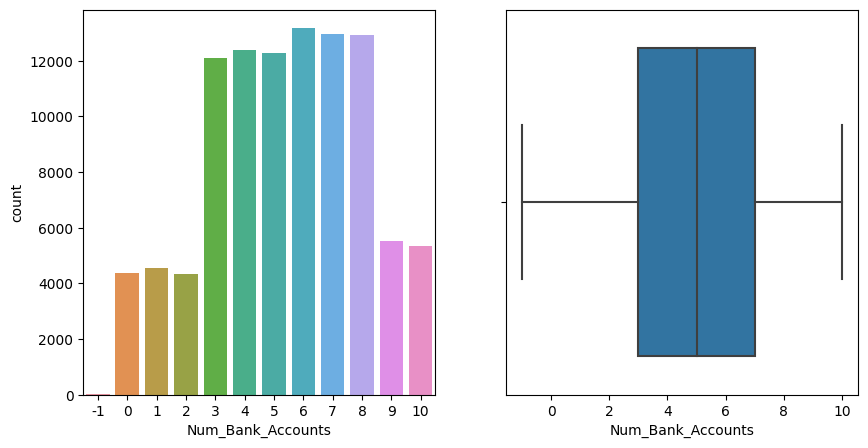

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(data=df,x='Num_Bank_Accounts',ax=axes[0])

sns.boxplot(data=df,x='Num_Bank_Accounts',ax=axes[1])

**Summary**

1)This shows some interesting data, the number of accounts owed by an individual is ranges as high as 10 and on an average the customers have 4 to accounts.

##Number of Credit Cards

In [ ]:
df['Num_Credit_Card'].value_counts()

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [ ]:
# df[['Customer_ID','Num_Credit_Card']][1000:1030] # To understand how data varies in the graph, multiple iterations gives a clear picture of possible imputation

In [ ]:
df['Num_Credit_Card']=df.groupby(['Customer_ID'])['Num_Credit_Card'].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(['Customer_ID'])['Num_Credit_Card'])

12500

In [ ]:
df['Num_Credit_Card'].max()


11

In [ ]:
df['Num_Credit_Card'].min()

0

In [ ]:
df['Num_Credit_Card'].mean()

5.53272

<Axes: xlabel='Num_Credit_Card'>

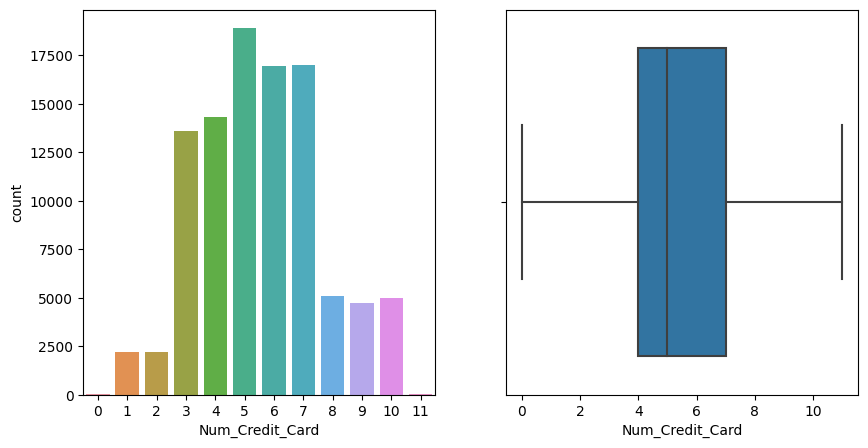

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(data=df,x='Num_Credit_Card',ax=axes[0])

sns.boxplot(data=df,x='Num_Credit_Card',ax=axes[1])

**Summary**

The number of credit cards owned is as high as 11. The range varies between 1 to 11 and on an average 4 to 6 cards are owned.

##Interest rates

In [ ]:
df['Interest_Rate'].value_counts()

8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: Interest_Rate, Length: 1750, dtype: int64

In [ ]:
# df[['Customer_ID','Interest_Rate']][20:40]

In [ ]:
len(df.groupby(['Customer_ID'])["Interest_Rate"].value_counts())

14534

In [ ]:
df['Interest_Rate']=df.groupby(['Customer_ID'])["Interest_Rate"].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(['Customer_ID'])["Interest_Rate"].value_counts())

12500

[]

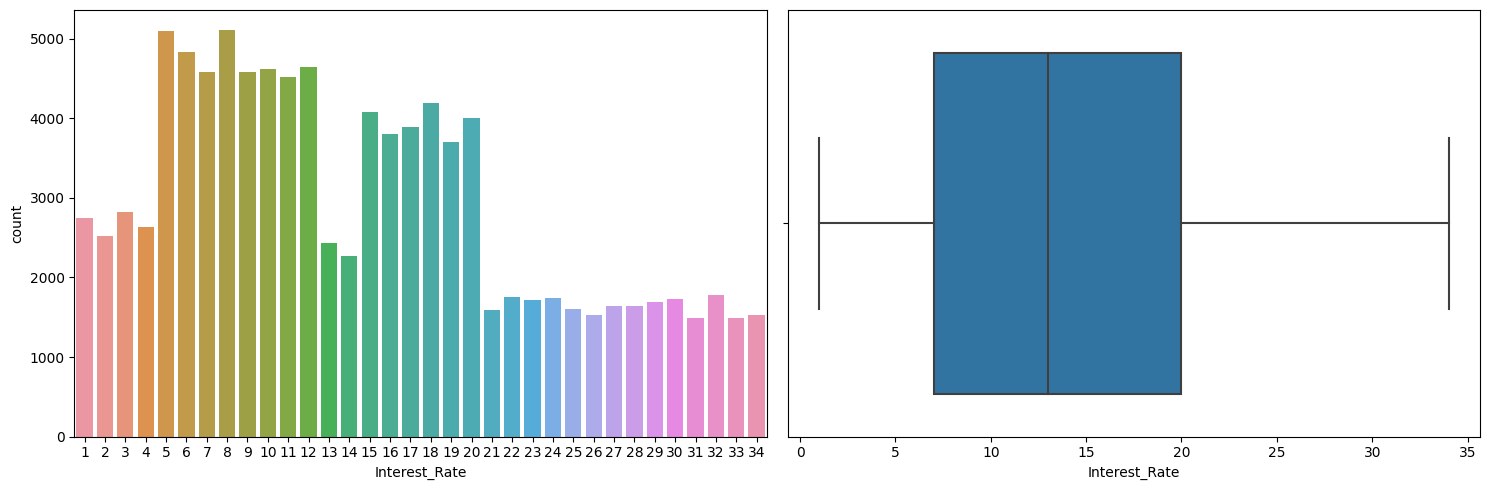

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(data=df,x="Interest_Rate",ax=axes[1])
sns.countplot(data=df,x="Interest_Rate",ax=axes[0])
plt.tight_layout()
plt.plot()

**Summary**

1)range varies between 1 to 34%.

2)the most popular lies between 10 to 15 percent.

##Number of Loans

In [ ]:
df['Num_of_Loan'].value_counts()

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

In [ ]:
df['Num_of_Loan']=df['Num_of_Loan'].str.strip("_").astype("int")

In [ ]:
df['Num_of_Loan']=df.groupby(['Customer_ID'])['Num_of_Loan'].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(['Customer_ID'])['Num_of_Loan'].value_counts())

12500

[]

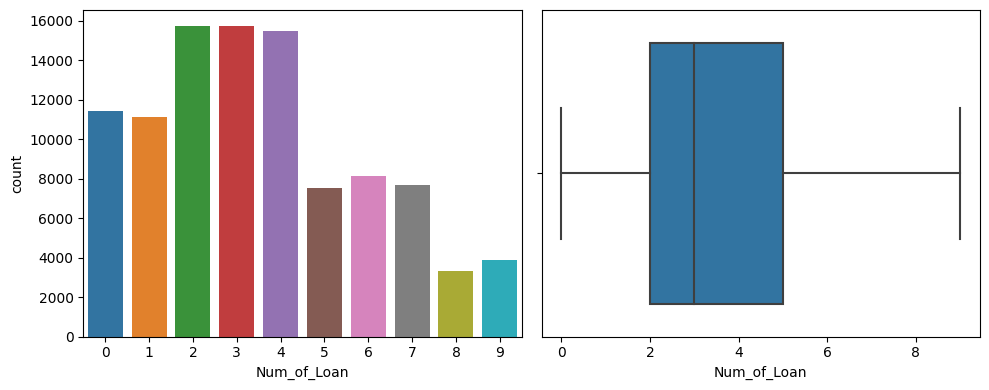

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.countplot(data=df,x='Num_of_Loan',ax=axes[0])
sns.boxplot(data=df,x='Num_of_Loan',ax=axes[1])
plt.tight_layout()
plt.plot()

**Summary**

1)Loans taken by Individuals lies as low as 0 and as high as 9.

2)On an average 2 to 4 loans are taken.

##Delay from Due Date

In [ ]:
df['Delay_from_due_date'].value_counts().tail(10)

-1     210
-2     168
-3     118
 63     69
 64     64
-4      62
 65     56
-5      33
 66     32
 67     22
Name: Delay_from_due_date, dtype: int64

In [ ]:
df[['Customer_ID','Delay_from_due_date']][0:9]

,Customer_ID,Delay_from_due_date
0,CUS_0xd40,3
1,CUS_0xd40,-1
2,CUS_0xd40,3
3,CUS_0xd40,5
4,CUS_0xd40,6
5,CUS_0xd40,8
6,CUS_0xd40,3
7,CUS_0xd40,3
8,CUS_0x21b1,3


In [ ]:
df['Delay_from_due_date']=df['Delay_from_due_date'].transform(lambda x: np.nan if x<0 else x)

In [ ]:
df['Delay_from_due_date']=df.groupby(['Customer_ID'])['Delay_from_due_date'].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(['Customer_ID'])['Delay_from_due_date'].value_counts())

12500

[]

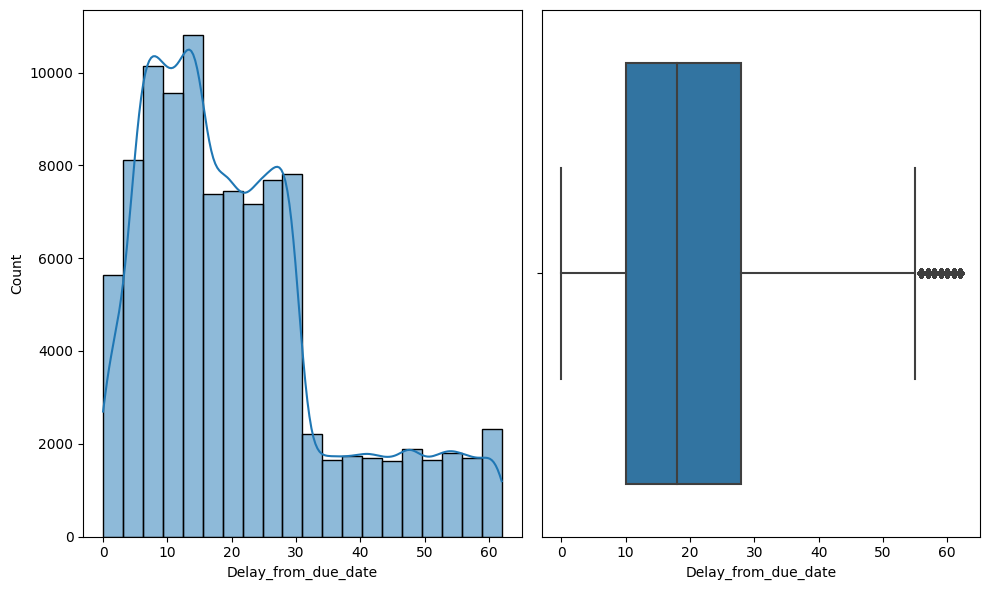

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
sns.histplot(data=df,x='Delay_from_due_date',ax=axes[0],bins=20,kde=True)
sns.boxplot(data=df,x='Delay_from_due_date',ax=axes[1])
plt.tight_layout()
plt.plot()

**Summary**

1)Deliquency varies between 0 to 60+ days.

2)On an average consumers are 20 days late.

##Number of Delayed Payments

In [ ]:
df["Num_of_Delayed_Payment"].value_counts()

19      5327
17      5261
16      5173
10      5153
18      5083
        ... 
848_       1
4134       1
1530       1
1502       1
2047       1
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [ ]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.strip("_").astype(float)

In [ ]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].fillna(df.groupby(['Customer_ID'])["Num_of_Delayed_Payment"].transform(lambda x: x.mode()[0]))

In [ ]:
df["Num_of_Delayed_Payment"]=df.groupby(['Customer_ID'])["Num_of_Delayed_Payment"].transform(lambda x: x.mode()[0])

In [ ]:
# df[['Customer_ID',"Num_of_Delayed_Payment"]][0:20]

[]

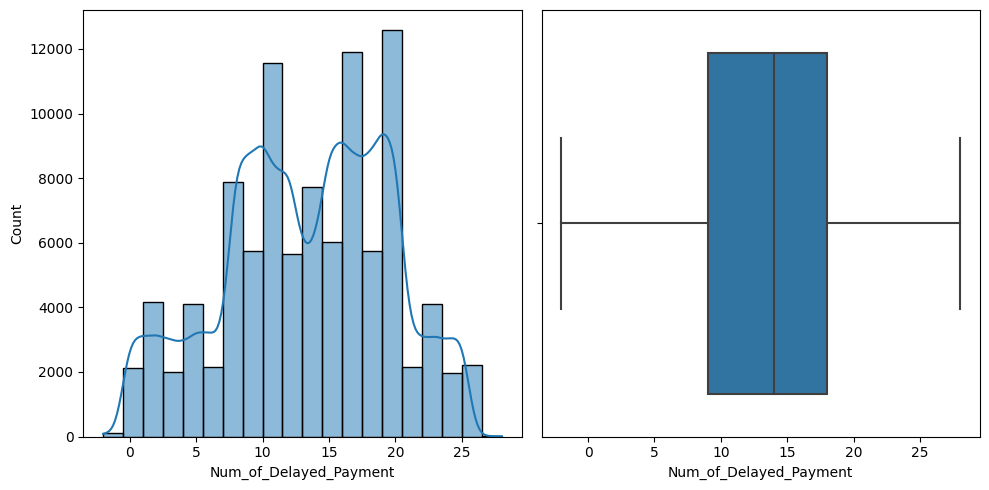

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.histplot(data=df,x="Num_of_Delayed_Payment",ax=axes[0],kde=True,bins=20)
sns.boxplot(data=df,x="Num_of_Delayed_Payment",ax=axes[1])
plt.tight_layout()
plt.plot()

**Summary**

1)Number of delayed payments lies between 0 to 25+.

2)Further investigation shows customers on an average have done 10 to 15 delayed payments.

##Changed Credit Limit

In [ ]:
df["Changed_Credit_Limit"].value_counts()

_        2091
8.22      135
11.5      127
11.32     126
7.35      121
         ... 
-5.78       1
30.1        1
35.89       1
-3.67       1
21.17       1
Name: Changed_Credit_Limit, Length: 3635, dtype: int64

In [ ]:
df["Changed_Credit_Limit"].replace("_",np.nan,inplace=True)

In [ ]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].astype("float")

In [ ]:
df["Changed_Credit_Limit"]=df["Changed_Credit_Limit"].fillna(df.groupby(["Customer_ID"])["Changed_Credit_Limit"].transform(lambda x: x.mode()[0]))

In [ ]:
df["Changed_Credit_Limit"].max()

36.97

In [ ]:
df["Changed_Credit_Limit"].min()

-6.49

[]

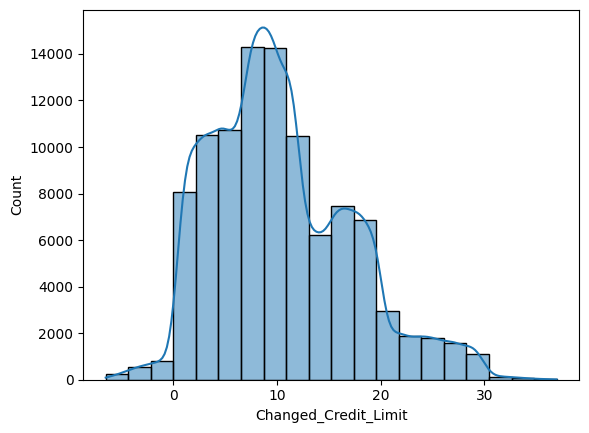

In [ ]:
sns.histplot(data=df,x="Changed_Credit_Limit",kde=True,bins=20)
plt.plot()

**Summary**

Change in credit limit varies between -6.49 to 36.97.

##Number of Credit Inquiries

In [ ]:
df["Num_Credit_Inquiries"].value_counts()

4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [ ]:
# df[['Customer_ID',"Num_Credit_Inquiries"]][96:120]

In [ ]:
j=pd.DataFrame(df.groupby(["Customer_ID"])["Num_Credit_Inquiries"].value_counts())

In [ ]:
j=j.rename({"Num_Credit_Inquiries":"a0"},axis=1).reset_index()

In [ ]:
a1=j['a0'].max()

In [ ]:
j1=j[j["a0"]==a1]

In [ ]:
j2=j1["Num_Credit_Inquiries"].max()

In [ ]:
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].transform(lambda x: np.nan if x>17 else x)

In [ ]:
df["Num_Credit_Inquiries"].value_counts()

4.0     11271
3.0      8890
6.0      8111
7.0      8058
2.0      8028
8.0      7866
1.0      7588
0.0      6972
5.0      5693
9.0      5283
11.0     5051
10.0     4936
12.0     4571
13.0     1480
14.0     1039
15.0      808
16.0      456
17.0      284
Name: Num_Credit_Inquiries, dtype: int64

In [ ]:
df["Num_Credit_Inquiries"]=df["Num_Credit_Inquiries"].fillna(df.groupby(['Customer_ID'])["Num_Credit_Inquiries"].transform(lambda x: x.mode()[0]))

[]

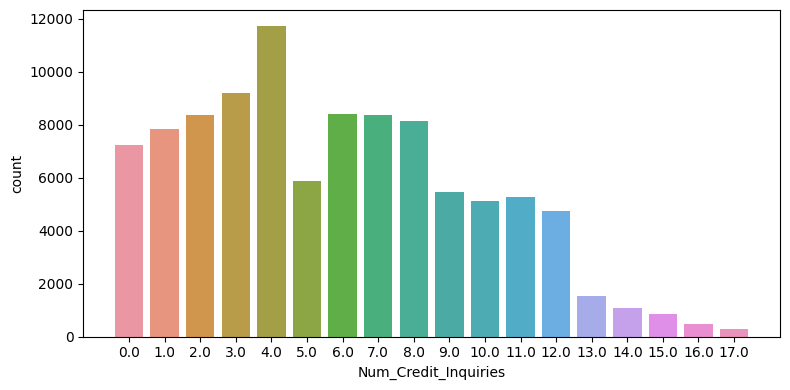

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x="Num_Credit_Inquiries")
plt.tight_layout()
plt.plot()

In [ ]:
df["Num_Credit_Inquiries"].isna().sum()

0

**Summary**

1)After dealing with null,garbage and outliers, the range of credit inquiries lies between 0 to 17.


##OutStanding Debt

In [ ]:
df["Outstanding_Debt"].value_counts()

1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [ ]:
# df[['Customer_ID',"Outstanding_Debt"]][15980:16000]

In [ ]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.strip("_").astype("float")

In [ ]:
df["Outstanding_Debt"]=df.groupby(['Customer_ID'])["Outstanding_Debt"].transform(lambda x: x.mode()[0])

In [ ]:
len(df.groupby(['Customer_ID'])["Outstanding_Debt"])

12500

In [ ]:
df["Outstanding_Debt"].max()

4998.07

In [ ]:
df["Outstanding_Debt"].min()

0.23

[]

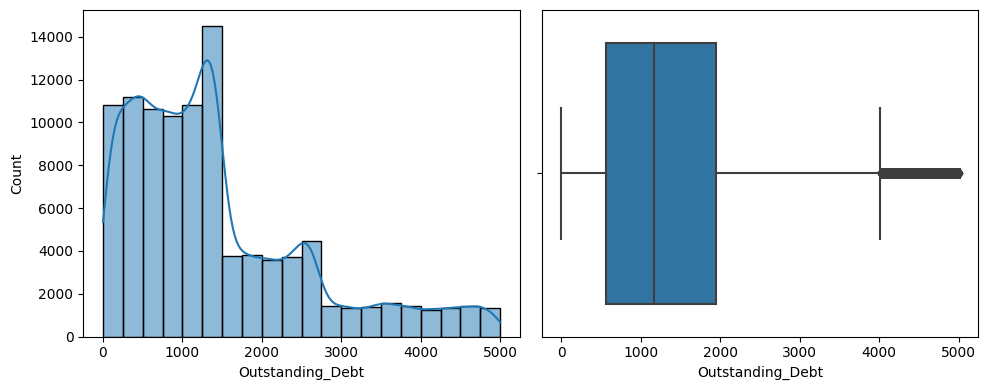

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sns.histplot(data=df,x="Outstanding_Debt",ax=axes[0],kde=True,bins=20)
sns.boxplot(data=df,x="Outstanding_Debt",ax=axes[1])
plt.tight_layout()
plt.plot()

**Summary**

1) It is as low as 0.23 and as high as 4998.07

2) Mostly the data lies between 1000 to 1500 but some outliers are present.

##Credit Utilization ratio

In [ ]:
df["Credit_Utilization_Ratio"].value_counts()

26.407909    2
33.163023    2
26.822620    1
30.462162    1
33.933755    1
            ..
38.730069    1
30.017515    1
27.279794    1
27.002436    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 99998, dtype: int64

In [ ]:
df["Credit_Utilization_Ratio"].max()

50.0

In [ ]:
df["Credit_Utilization_Ratio"].min()

20.0

In [ ]:
# df[['Customer_ID',"Credit_Utilization_Ratio"]][70000:70020]

[]

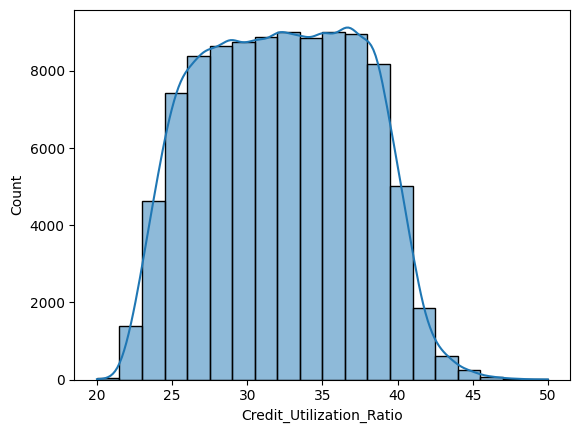

In [ ]:
sns.histplot(data=df,x="Credit_Utilization_Ratio",kde=True,bins=20)
plt.plot()

**Summary**

1)Nearly a normal curve pops up, mostly data lies between 25 to 40.

## Credit History Age

In [ ]:
df["Credit_History_Age"].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [ ]:
def Month_Converter(val):
    if pd.notnull(val):
        years = int(val.split(' ')[0])
        month = int(val.split(' ')[3])
        return (years*12)+month
    else:
        return val

df['Credit_History_In_Months'] = df['Credit_History_Age'].apply(lambda x: Month_Converter(x)).astype(float)

In [ ]:
df['Credit_History_In_Months'].isna().sum()

9030

In [ ]:
df['Credit_History_In_Months']=df.groupby(['Customer_ID'])['Credit_History_In_Months'].transform(lambda x: x.fillna(x.mode()[0]+1))

In [ ]:
df['Credit_History_In_Months'].min()

1.0

In [ ]:
df['Credit_History_In_Months'].max()

404.0

[]

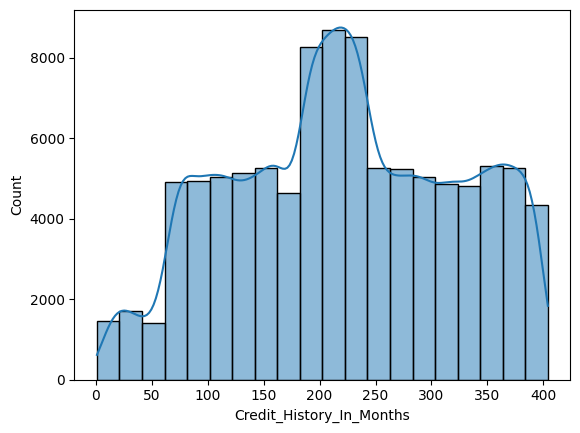

In [ ]:
sns.histplot(data=df,x="Credit_History_In_Months",bins=20,kde=True)
plt.plot()

**Summary**

1)Consumer have as low as 1 month of crdit history and as high as 404 month of credit history.

2)Highest of numbers lies betwen 150 to 250

##Total EMI per month

In [ ]:
df["Total_EMI_per_month"].value_counts()

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [ ]:
df["Total_EMI_per_month"]=df.groupby(["Customer_ID"])["Total_EMI_per_month"].transform(lambda x: x.mode()[0])

In [ ]:
df["Total_EMI_per_month"].value_counts()

0.000000      11072
49.574949         8
181.855775        8
10.898897         8
10.516560         8
              ...  
56.747677         8
39.628117         8
306.617015        8
203.082308        8
35.104023         8
Name: Total_EMI_per_month, Length: 11117, dtype: int64

[]

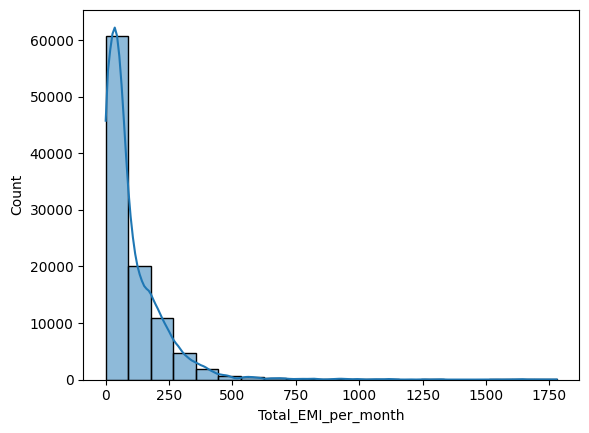

In [ ]:
sns.histplot(data=df,x="Total_EMI_per_month",kde=True,bins=20)
plt.plot()

**Summary**

1)Minimum value is 0 and maximum is 1750.

2)Most of the population have EMIs committment between 0 to 250.

##Monthly Investment

In [ ]:
df["Amount_invested_monthly"].value_counts()

__10000__      4305
0               169
80.41529544       1
36.66235139       1
89.73848936       1
               ... 
36.54190859       1
93.45116319       1
140.8097222       1
38.7393767        1
167.1638652       1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [ ]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.strip("__").astype("float")

In [ ]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].fillna(df.groupby(["Customer_ID"])["Amount_invested_monthly"].transform(lambda x: x.mean()))

[]

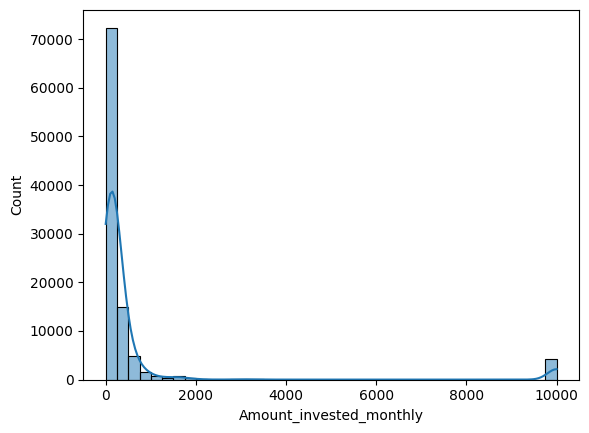

In [ ]:
sns.histplot(data=df,x="Amount_invested_monthly",kde=True,bins=40)
plt.plot()

**Summary**

1)Skewed obseravation, with the data lying between 0 to 2000.

##Monthly Balance

In [ ]:
df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
350.0148691                         2
695.0571561                         2
312.4940887                         1
604.3402009                         1
                                   ..
280.6862317                         1
366.289038                          1
151.1882696                         1
306.7502785                         1
393.6736956                         1
Name: Monthly_Balance, Length: 98790, dtype: int64

In [ ]:
df.replace("__-333333333333333333333333333__",np.nan,inplace=True)

In [ ]:
# df["Monthly_Balance"]=df["Monthly_Balance"].str.strip("_").astype("float")

In [ ]:
df["Monthly_Balance"]=df["Monthly_Balance"].astype("float")

In [ ]:
df["Monthly_Balance"]=df["Monthly_Balance"].fillna(df.groupby(["Customer_ID"])["Monthly_Balance"].transform(lambda x: x.mean()))

[]

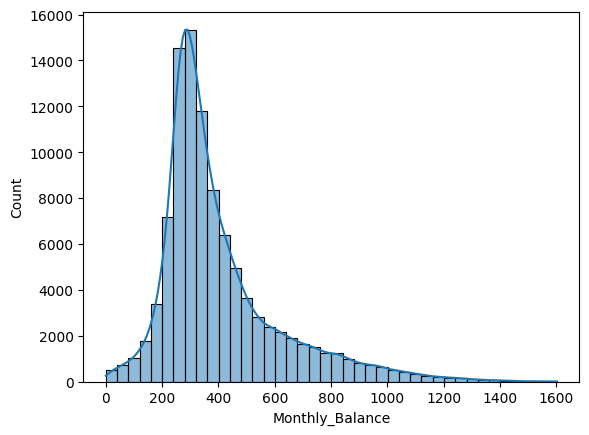

In [ ]:
sns.histplot(data=df,x="Monthly_Balance",kde=True,bins=40)
plt.plot()

**Summary**

1)Slightly skewd observation, data ranges as low as 0 to as high as 1600+.

2)Most of the customer lies between 200$ to 700$.

In [ ]:
# df[['Customer_ID',"Monthly_Balance"]][0:15]

#Credit

**Credit Score**

A numerical representation of creditworthiness, reflecting credit history and financial behavior.
It's used by lenders, landlords, and others to assess the risk of lending money or extending credit to an individual.

Out of all the columns, we will try to get the data which will help to know the 5Cs of credit which is character, capital, collateral,capacity and condition.






**Feature Engineering1: (label encoding)**

In [ ]:
df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].replace({"Yes": 1, "No": 0})

In [ ]:
df["Credit_Mix"] = df["Credit_Mix"].replace({"Standard": 1, "Good": 2, "Bad": 0})

In [ ]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace({
      "Low_spent_Small_value_payments": 1,
      "Low_spent_Medium_value_payments": 2,
      "Low_spent_Large_value_payments": 3,
      "High_spent_Small_value_payments": 4,
      "High_spent_Medium_value_payments": 5,
      "High_spent_Large_value_payments": 6
      })

In [ ]:
df["Payment_History"] = (-1 * df["Delay_from_due_date"] -1 * df["Num_of_Delayed_Payment"] + 1 * df["Payment_of_Min_Amount"])

**Feature engineering 2: Standarization**

In [ ]:
df_new=pd.DataFrame(df.groupby(['Customer_ID'])["Payment_History"].mean())

In [ ]:
df_new["Payment_History"]=(df_new["Payment_History"]-df_new["Payment_History"].mean())/df_new["Payment_History"].std()

In [ ]:
df_new["Credit_Mix"]=pd.DataFrame(df.groupby(['Customer_ID'])["Credit_Mix"].mean())
df_new["Credit_Mix"]=(df_new["Credit_Mix"]-df_new["Credit_Mix"].mean())/df_new["Credit_Mix"].std()

In [ ]:
df_new['Credit_Utilization_Ratio']=pd.DataFrame(df.groupby(['Customer_ID'])['Credit_Utilization_Ratio'].mean())/100
df_new['Credit_Utilization_Ratio']=(df_new['Credit_Utilization_Ratio']-df_new['Credit_Utilization_Ratio'].mean())/df_new['Credit_Utilization_Ratio'].std()

In [ ]:
df_new['Outstanding_Debt']=pd.DataFrame(df.groupby(['Customer_ID'])['Outstanding_Debt'].mean())
df_new['Outstanding_Debt']=(df_new['Outstanding_Debt']-df_new['Outstanding_Debt'].mean())/df_new['Outstanding_Debt'].std()

In [ ]:
df_new['Num_Credit_Inquiries']=pd.DataFrame(df.groupby(['Customer_ID'])['Num_Credit_Inquiries'].mean())
df_new['Num_Credit_Inquiries']=(df_new['Num_Credit_Inquiries']-df_new['Num_Credit_Inquiries'].mean())/df_new['Num_Credit_Inquiries'].std()

In [ ]:
df_new['Changed_Credit_Limit']=pd.DataFrame(df.groupby(['Customer_ID'])['Changed_Credit_Limit'].mean())
df_new['Changed_Credit_Limit']=(df_new['Changed_Credit_Limit']-df_new['Changed_Credit_Limit'].mean())/df_new['Changed_Credit_Limit'].std()

In [ ]:
df_new['Credit_History_In_Months']=pd.DataFrame(df.groupby(['Customer_ID'])['Credit_History_In_Months'].max())
df_new['Credit_History_In_Months']=(df_new['Credit_History_In_Months']-df_new['Credit_History_In_Months'].mean())/df_new['Credit_History_In_Months'].std()

In [ ]:
df["debt_to_Income"]=df['Outstanding_Debt'] / df['Monthly_Inhand_Salary']

In [ ]:
df_new["debt_to_Income"]=pd.DataFrame(df.groupby(['Customer_ID'])["debt_to_Income"].mean())
df_new["debt_to_Income"]=(df_new["debt_to_Income"]-df_new["debt_to_Income"].mean())/df_new["debt_to_Income"].std()

In [ ]:
df_new["Age"]=pd.DataFrame(df.groupby(['Customer_ID'])["Age"].mean())

In [ ]:
df_new=df_new.reset_index()

In [ ]:
df_new

,Customer_ID,Payment_History,Credit_Mix,Credit_Utilization_Ratio,Outstanding_Debt,Num_Credit_Inquiries,Changed_Credit_Limit,Credit_History_In_Months,debt_to_Income,Age
0,CUS_0x1000,-2.805987,-1.454655,0.578666,0.118329,1.373629,-1.300822,-0.959390,-0.148258,17.0
1,CUS_0x1009,0.468128,-0.090268,-1.186664,-1.059187,-0.748910,-0.100749,1.479004,-0.612529,26.0
2,CUS_0x100b,0.682824,1.274120,1.240576,-0.342824,-1.085821,0.088053,-0.347283,-0.559788,18.0
3,CUS_0x1011,-0.390657,-0.090268,-2.246615,-0.825057,0.329205,0.578019,-0.347283,-0.574722,44.0
4,CUS_0x1013,0.682824,1.274120,-0.170455,-0.166824,-0.748910,-1.327576,-0.106454,-0.518570,44.0
...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0xff3,0.629150,1.274120,0.293234,-0.170659,-0.411999,-0.291079,-0.176695,0.261155,55.0
12496,CUS_0xff4,0.468128,-0.090268,0.151942,-0.578080,-0.209852,-0.333884,0.003926,-0.379227,37.0
12497,CUS_0xff6,1.541608,1.274120,0.472144,-0.941784,-1.018438,0.230992,0.746482,-0.623839,19.0
12498,CUS_0xffc,-1.464137,-1.454655,1.182659,-0.109153,1.777922,-0.239865,-0.678423,-0.435993,17.0


##Credit Score calculation



1)  Selected column: Payment Hisory
            
    Weightage: 0.35
    reason: Will help to understand how consumer manages his debt.
    impact: the higher the better

2)  Selected column: credit History in months
            
    Weightage: 0.2
    reason: Will help to understand for how long consumer is using credit service.
    impact: the higher the better

3)  Selected column: debt_to_Income
            
    Weightage: 0.2
    reason: Will help to understand for how much consumer is in debt comapared to the income.
    impact: the lower the better

4)  Selected column: Credit_Mix
            
    Weightage: 0.05
    reason: Will help to understand for different type of loan a consumer has taken
    impact: the higher the better

5)  Selected column: Credit_Utilization_ratio
            
    Weightage: 0.05
    reason: Will help to understand how efficently consumer issuing its credit line
    impact: the lower the better

6)  Selected column: outstanding debt
            
    Weightage: 0.05
    reason: Will help to understand how much debt a consumer needs to pay.
    impact: the lower the better

7)  Selected column: Number of Credit Inquiries
            
    Weightage: 0.05
    reason: Will help to understand how much a consumer is inclined towards taking a loan.
    impact: the lower the better

8)  Selected column: Changed Credit limit
            
    Weightage: 0.1
    reason: Will help to understand how the credit limit has varied for a consumer
    impact: the higher the better


**Credit Rating**

0 to 29: Very Bad

30 to 49: Bad

50 to 64: Good

65 to 84: fair

Greater than 85: Excellent

In [ ]:
df_new["Credit_Score"]=((0.35*df_new["Payment_History"])
                        + (0.2* df_new["Credit_History_In_Months"])
                        + (0.2*(1-df_new["debt_to_Income"]))
                        + (0.05*df_new["Credit_Mix"])
                        + (0.05*(1-df_new["Credit_Utilization_Ratio"]))
                        + (0.05*(df_new["Outstanding_Debt"]))
                        + (0.05*(1-df_new["Num_Credit_Inquiries"]))
                        + (0.05*df_new["Changed_Credit_Limit"])
                        )

In [ ]:
df_new["Credit_Score"] = (df_new["Credit_Score"] - df_new["Credit_Score"].min()) / (df_new["Credit_Score"].max() - df_new["Credit_Score"].min()) * 100

In [ ]:
df_new["Rating_type"]=df_new["Credit_Score"].transform(lambda x: 'Very Bad' if x < 30 else ('Bad' if x < 50 else ('Fair' if x < 65 else ('Good' if x < 85 else 'Excellent'))) )

In [ ]:
df_final=df_new[['Customer_ID',"Age","Credit_Score","Rating_type"]]

In [ ]:
df_final

,Customer_ID,Age,Credit_Score,Rating_type
0,CUS_0x1000,17.0,38.992091,Bad
1,CUS_0x1009,26.0,86.900546,Excellent
2,CUS_0x100b,18.0,79.878717,Good
3,CUS_0x1011,44.0,71.767514,Good
4,CUS_0x1013,44.0,80.640521,Good
...,...,...,...,...
12495,CUS_0xff3,55.0,76.375535,Good
12496,CUS_0xff4,37.0,76.714219,Good
12497,CUS_0xff6,19.0,92.983258,Excellent
12498,CUS_0xffc,17.0,52.825015,Fair


In [ ]:
df_final["Rating_type"].value_counts()

Good         6408
Excellent    2544
Fair         2240
Bad          1226
Very Bad       82
Name: Rating_type, dtype: int64

[]

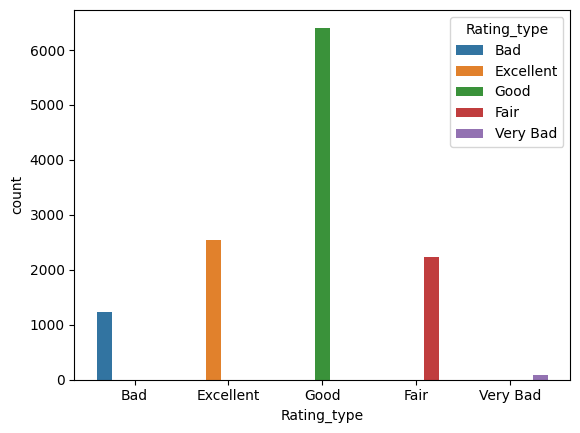

In [ ]:
sns.countplot(data=df_final,x="Rating_type",hue="Rating_type")
plt.plot()

<Axes: xlabel='Age', ylabel='Rating_type'>

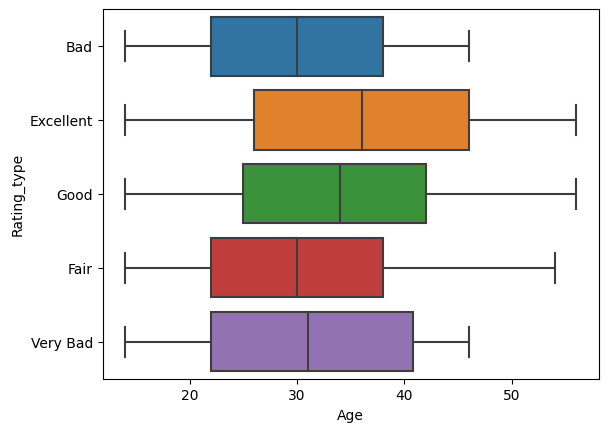

In [ ]:
sns.boxplot(data=df_final,x="Age",y="Rating_type")

**Summary**

1)Customers of all ratings are available, Good rating consumers leads the chart.

2)All age group have numbers in all the available ratings but data of younger people are more inclined towards Bad credit rating

#Insights

1)Data of 12500 unique customers for Month January and August are given.

2)bank have all age group of customers which shows penetration of bank provided service in every age group.

3)Ananlysis of monthly salary shows all types of customer available and skewed graph showed the from where the actual consumer comes.

4) Eight type of loan are availale which is auto loan,credit-builder loan,debt consolidation loan,home equity loan,mortgage loan,not specified,payday loan,personal loan,student loan

5) number of bank account lies between 0 to 10, most of them lies between 3 to 8, while most of credit cards owned lies 3 to 7. This data shows the usability credit servies by consumers.

6) Interest rate lies between 0 to 31% and number of loans taken lies betwen 0 to 9, 2 to 5 having the maximum concentrartion.

7) Range of delay in payment lies between  0 to 60+ days, 0 to 30 sees the maximum number.

8) Credit inquiries made goes upto 17, 0 to 10 sees the maximum number.

9) Credit Score lies between 0 to 100, and most of the customers are having good rating.

10) All age group is exposed to credit.


**Recommendation**

1) Customers are using credit facility effectively, lucarative offers can attract more customers.

2) Financial education can help young people to use credit facility effectively and can help them improve their credit rating as they are the mostly in the very bad and bad rating of customers.

